In [1]:
pip install ipynb

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
from tensorflow.keras import Input, layers
from tensorflow.keras import models
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.lite.experimental.microfrontend.python.ops import audio_microfrontend_op as frontend_op
print(tf.__version__)
import numpy as np
import shutil, os
import matplotlib.pyplot as plt
import pathlib
import random
import sys
import io
import os
import glob
from datetime import datetime as dt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.regularizers import l2

%run functions.ipynb #pulling in functions from other file 

2.8.0


In [16]:
NUM_LABELS=2 #Binary classification so 2, [bird:0, unknown:1]
IMG_SIZE=96 #image resolution is 96x96 dictated by pico
EPOCHS=1000 #Number of epochs to train for
BATCH_SIZE = 64 #Batch for speed and regularization
INPUT_SHAPE= (IMG_SIZE,IMG_SIZE,1)
norm_layer = tf.keras.layers.Normalization(axis=-1)

In [4]:
#Getting training and validation data
validation_generator=val_gen('data/train')
train_generator=train_gen('data/train')                             

Found 169831 images belonging to 2 classes.
Found 169831 images belonging to 2 classes.


In [7]:
model = models.Sequential([
    layers.Input(shape=INPUT_SHAPE),
    norm_layer,
    
    
    
    layers.Conv2D(8, 3,2, activation='relu'),
    layers.DepthwiseConv2D(kernel_size=(3,3), padding='same'),


                        
    layers.Conv2D(16, 3, activation='relu'),
    layers.DepthwiseConv2D(kernel_size=(3,3), padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.4), 
    
    layers.Conv2D(32, 3, activation='relu'),
    layers.DepthwiseConv2D(kernel_size=(3,3), padding='same'),
    #layers.MaxPooling2D(pool_size=(2, 2)),

                        
    layers.Conv2D(16, 3, activation='relu'),
    layers.DepthwiseConv2D(kernel_size=(3,3), padding='same'),
  #  layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(8, 3, activation='relu'),
    layers.DepthwiseConv2D(kernel_size=(3,3), padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),                   
    
    
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    
    layers.Dense(NUM_LABELS),
], name="attempt_1")
model.summary()


Model: "attempt_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 96, 96, 1)        3         
 n)                                                              
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 8)         80        
                                                                 
 depthwise_conv2d_10 (Depthw  (None, 47, 47, 8)        80        
 iseConv2D)                                                      
                                                                 
 conv2d_11 (Conv2D)          (None, 45, 45, 16)        1168      
                                                                 
 depthwise_conv2d_11 (Depthw  (None, 45, 45, 16)       160       
 iseConv2D)                                                      
                                                         

Steps: 256
Epoch 1/1000
256/256 [==============================] - 32s 123ms/step - loss: 0.2790 - accuracy: 0.8757 - val_loss: 0.2676 - val_accuracy: 0.8833
Epoch 2/1000
256/256 [==============================] - 29s 114ms/step - loss: 0.2777 - accuracy: 0.8768 - val_loss: 0.2877 - val_accuracy: 0.8723
Epoch 3/1000
256/256 [==============================] - 28s 109ms/step - loss: 0.2800 - accuracy: 0.8703 - val_loss: 0.2632 - val_accuracy: 0.8835
Epoch 4/1000
256/256 [==============================] - 27s 104ms/step - loss: 0.2746 - accuracy: 0.8782 - val_loss: 0.2600 - val_accuracy: 0.8815
Epoch 5/1000
256/256 [==============================] - 26s 101ms/step - loss: 0.2676 - accuracy: 0.8805 - val_loss: 0.2596 - val_accuracy: 0.8854
Epoch 6/1000
256/256 [==============================] - 26s 100ms/step - loss: 0.2702 - accuracy: 0.8778 - val_loss: 0.2547 - val_accuracy: 0.8889
Epoch 7/1000
256/256 [==============================] - 25s 98ms/step - loss: 0.2690 - accuracy: 0.8824 - v

Epoch 57/1000
256/256 [==============================] - 23s 92ms/step - loss: 0.2356 - accuracy: 0.8973 - val_loss: 0.2216 - val_accuracy: 0.9033
Epoch 58/1000
256/256 [==============================] - 23s 91ms/step - loss: 0.2355 - accuracy: 0.8979 - val_loss: 0.2237 - val_accuracy: 0.9046
Epoch 59/1000
256/256 [==============================] - 23s 91ms/step - loss: 0.2375 - accuracy: 0.8971 - val_loss: 0.2247 - val_accuracy: 0.9012
Epoch 60/1000
256/256 [==============================] - 23s 91ms/step - loss: 0.2308 - accuracy: 0.8999 - val_loss: 0.2164 - val_accuracy: 0.9064
Epoch 61/1000
256/256 [==============================] - 23s 91ms/step - loss: 0.2296 - accuracy: 0.9040 - val_loss: 0.2212 - val_accuracy: 0.9046
Epoch 62/1000
256/256 [==============================] - 23s 91ms/step - loss: 0.2277 - accuracy: 0.9028 - val_loss: 0.2283 - val_accuracy: 0.9020
Epoch 63/1000
256/256 [==============================] - 23s 91ms/step - loss: 0.2322 - accuracy: 0.8970 - val_loss: 0

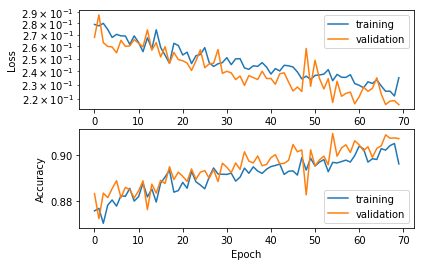



Bird accuracy: 0.8485
Unknown accuracy: 0.971


In [17]:
EPOCHS=1000
patience=15


steps=256
model_compile()
print("Steps:",steps)


callback=tf.keras.callbacks.EarlyStopping(
    monitor= 'val_accuracy',
    verbose=1,
    patience=15,
    restore_best_weights=True
)

history = model.fit(
    train_generator, 
    validation_data=validation_generator,  
    steps_per_epoch=steps,
    validation_steps=steps,
    epochs=EPOCHS,
    callbacks=[callback]
)
print("\n")
save_model()
print("\n")
plot_accuracy(history)
print("\n")
test_model(2000)

In [18]:
BASE_DIR ="/Users/Jeromey/IOT/project2/data/train"

In [19]:
# model = tf.keras.models.load_model(argv[1])
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# with tf.io.gfile.GFile('vww_96_float.tflite', 'wb') as float_file:
#   float_file.write(tflite_model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
def representative_dataset_gen():
  dataset_dir = os.path.join(BASE_DIR, "person")
  for idx, image_file in enumerate(os.listdir(dataset_dir)):
    # 10 representative images should be enough for calibration.
    if idx > 10:
        return
    full_path = os.path.join(dataset_dir, image_file)
    if os.path.isfile(full_path):
      img = tf.keras.preprocessing.image.load_img(
          full_path, color_mode="grayscale").resize((96, 96))
      arr = tf.keras.preprocessing.image.img_to_array(img)
      # Scale input to [0, 1.0] like in training.
      yield [arr.reshape(1, 96, 96, 1)]
      #yield [arr.reshape(1, 96, 96, 1) / 255.] 

# Convert model to full-int8 and save as quantized tflite flatbuffer.
converter.representative_dataset = representative_dataset_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
quantized_tflite_model = converter.convert()
with tf.io.gfile.GFile('vww_96_int8.tflite', 'wb') as quantized_file:
    quantized_file.write(quantized_tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Jeromey\AppData\Local\Temp\tmpfbdujmxh\assets


INFO:tensorflow:Assets written to: C:\Users\Jeromey\AppData\Local\Temp\tmpfbdujmxh\assets


INFO:tensorflow:Assets written to: C:\Users\Jeromey\AppData\Local\Temp\tmp_cj0_49o\assets


INFO:tensorflow:Assets written to: C:\Users\Jeromey\AppData\Local\Temp\tmp_cj0_49o\assets
C:\Users\Jeromey\anaconda3\envs\IOT\lib\site-packages\tensorflow\lite\python\convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [15]:
fname = 'vww_96_int8.tflite'
with open(fname, "wb") as fpo:
  num_bytes_written = fpo.write(quantized_tflite_model)
print(f"Wrote {num_bytes_written} / {len(quantized_tflite_model)} bytes to tflite file")

Wrote 91464 / 91464 bytes to tflite file
